<a href="https://colab.research.google.com/github/zilver666/229352-StatisticalLearning-Lab/blob/main/229351_LAB03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ *.pdf

### ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

ดาวน์โหลดข้อมูลสัตว์ต่างๆ 50 ชนิดดังนี้  
ชนิดสัตว์: https://donlapark.pages.dev/229351/data/classes.txt  
ตัวแปรต่างๆ: https://donlapark.pages.dev/229351/data/predicates.txt  
ค่าของสัตว์แต่ละชนิด: https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

In [1]:
!pip install -q wget

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA



  Preparing metadata (setup.py) ... done


In [2]:
# Download the files
!wget -O classes.txt https://donlapark.pages.dev/229351/data/classes.txt
!wget -O predicate-matrix-continuous.txt https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

--2025-07-20 13:16:28--  https://donlapark.pages.dev/229351/data/classes.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     755  --.-KB/s    in 0s      

2025-07-20 13:16:29 (13.8 MB/s) - ‘classes.txt’ saved [755/755]

--2025-07-20 13:16:29--  https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29800 (29K) [text/plain]
Saving to: ‘predicate-matrix-continuous.txt’

predicate-matrix-co 100%[===================>]  

In [3]:
classes = np.genfromtxt('classes.txt',dtype='str')

classes[:5]

array([['1', 'antelope'],
       ['2', 'grizzly+bear'],
       ['3', 'killer+whale'],
       ['4', 'beaver'],
       ['5', 'dalmatian']], dtype='<U15')

In [4]:
data = np.genfromtxt('predicate-matrix-continuous.txt')

data[:5,:5]

array([[-1.  , -1.  , -1.  , -1.  , 12.34],
       [39.25,  1.39,  0.  , 74.14,  3.75],
       [83.4 , 64.79,  0.  ,  0.  ,  1.25],
       [19.38,  0.  ,  0.  , 87.81,  7.5 ],
       [69.58, 73.33,  0.  ,  6.39,  0.  ]])

#### Exercise 1

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ฟังก์ชัน $\texttt{np.linalg.eigh}$  
ดังนั้น เมทริกซ์ที่ได้ต้องมีขนาด 50x2

$$ \Sigma =
  \begin{pmatrix}
\text{var}(X_1) & \text{cov}(X_1,X_2) & \cdots & \text{cov}(X_1,X_{85}) \\
\text{cov}(X_2,X_1) & \text{var}(X_2) & \cdots & \text{cov}(X_2,X_{85}) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_{85},X_1) & \text{cov}(X_{85},X_1) & \cdots & \text{var}(X_{85}) \\
\end{pmatrix}
 $$

In [5]:
# ใช้ Numpy # TODO: enter code here
data_c = data - np.mean(data, axis=0)
cov_matrix = np.cov(data_c.T)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
top_two_eigenvectors = eigenvectors[:, -2:]
data_pca_numpy = data_c @ top_two_eigenvectors
print(data_pca_numpy[:5])

[[ 106.35992505   14.33200256]
 [ -76.22681969  -58.9630861 ]
 [-139.3662367   170.08767172]
 [ -54.04638157   31.85582565]
 [ -11.3917049   -29.65753503]]


#### OPTIONAL

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ $scikit-learn$  
พร้อมกับตรวจสอบว่าเมทริกซ์ที่ได้จากทั้งสองวิธีนี้มีค่าเท่ากัน (ต่างกันแค่ค่าบวกลบ)

In [6]:
pca_skl = PCA(n_components=2)
data_pca_skl = pca_skl.fit_transform(data)
print("scikit-learn PCA results (first 5 rows):")
print(data_pca_skl[:5])
print("\nBoth methods are equal:")
print(np.allclose(np.abs(data_pca_numpy), np.abs(data_pca_skl)))


scikit-learn PCA results (first 5 rows):
[[  14.33200256  106.35992505]
 [ -58.9630861   -76.22681969]
 [ 170.08767172 -139.3662367 ]
 [  31.85582565  -54.04638157]
 [ -29.65753503  -11.3917049 ]]

Both methods are equal:
False


#### Exercise 2

ทำการพล็อตจุดของข้อมูลที่ได้จาก PCA ข้างบนพร้อมกับใส่คำกำกับว่าจุดไหนเป็นของสัตว์ชนิดใดโดยใช้ชื่อสัตว์จาก classes.txt

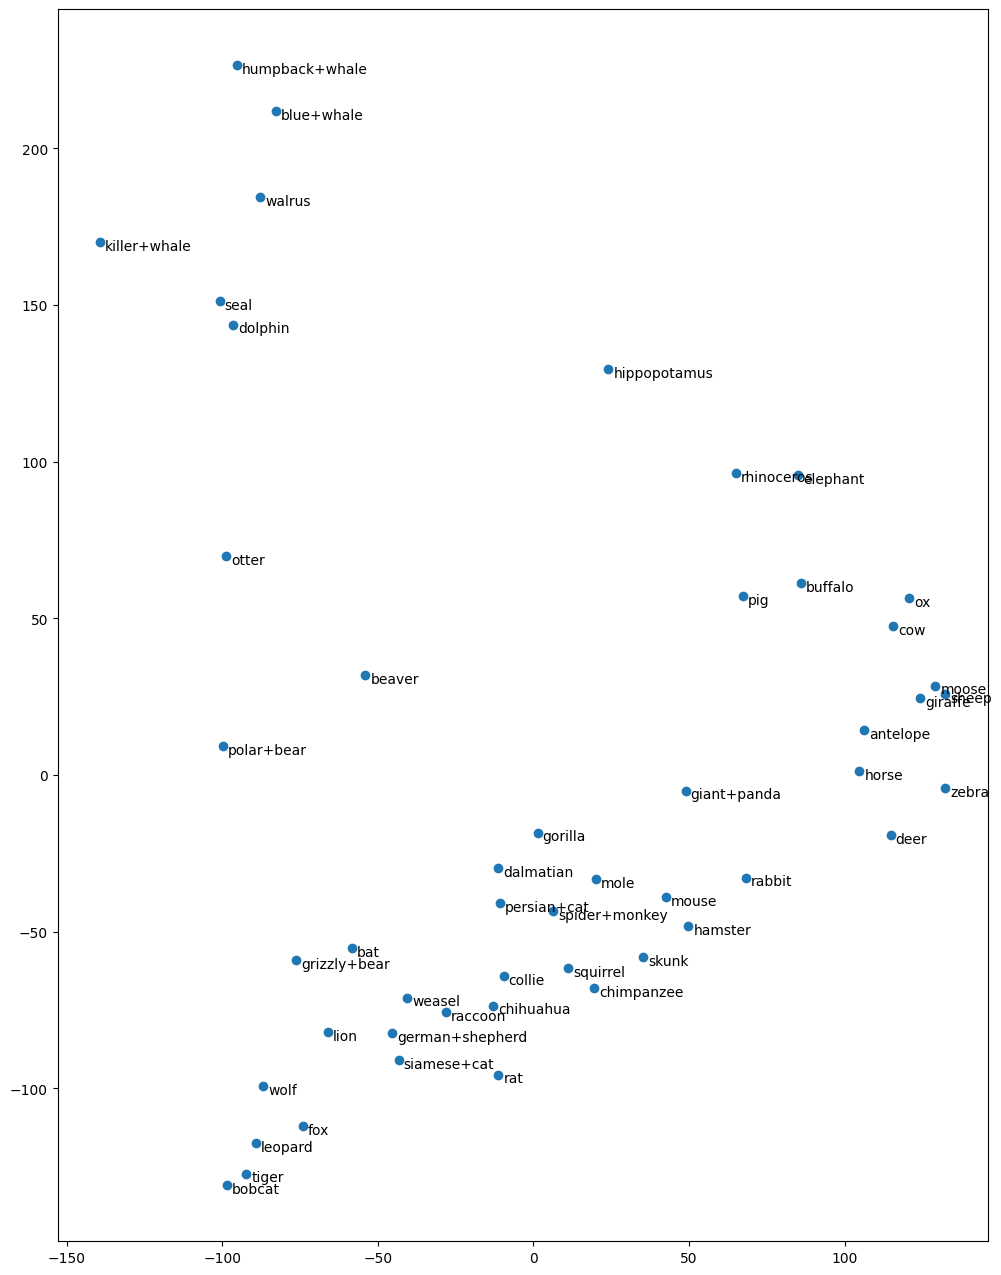

In [7]:
plt.figure(figsize=(12,16))
plt.scatter(data_pca_numpy[:, 0], data_pca_numpy[:, 1])
for i in range(50):
  plt.annotate(
          classes[i,1],
          xy=(data_pca_numpy[i, 0],
              data_pca_numpy[i, 1]),
              xytext=(5, -8),
              textcoords='offset pixels')


plt.show()

#### Exercise 3

หากลุ่มสัตว์ต่างๆ ที่อยู่ใกล้กันมา 4 กลุ่ม แล้วลองอธิบายว่าสัตว์ในแต่ละกลุ่มมีอะไรที่เหมือนกัน

1.กลุ่มสัตว์ที่อยู่ล่างซ้าย ตัวอย่างคือ leopard tiger bobcat fox wolf มีสิ่งที่เหมือนกันคือ เป็นสัตว์นักล่า และเลี้ยงลูกด้วยนม physical เหมาะกับการล่าเหยื่อเช่นมีฟันหรือเล็บที่แหลมคม
2.กลุ่มสัตว์ที่อยู่บนซ้าย ตัวอย่างคือ walrus seal dolphin killer+whale มีสิ่งที่เหมือนกันคือ เป็นสัตว์ทะเลเลี้ยงลูกด้วยนม physical เพรียวยาวว่ายน้ำได้ดี
3.กลุ่มสัตว์ที่อยู่ (100,50);(x,y) ตัวอย่างคือ ox cow buffalo pig มีสิ่งที่เหมือนกันคือ เป็นสัตว์เลี้ยงลูกด้วยนม และเป็นสัตว์กินพืช
4.กลุ่มสัตว์ที่อยู๋ตรงกลางฝั่งขวา ตัวอย่างคือ horse zebra deer antelope มีสิ่งที่เหมือนกันคือ เป็นสัตว์กินพืช เลี้ยงลูกด้วยนม และเป็นสัตว์มีกีบ เพื่อใช้ในการวิ่งที่รวดเร็ว